In [1]:
import keras
import tensorflow as tf
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import layers
from tensorflow import keras


In [2]:
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True, rescale=1/255)

targetSize = 40

train_generator = train_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/train',target_size=(targetSize, targetSize),batch_size=64,class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255)
val_generator = val_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/valid',target_size=(targetSize, targetSize),batch_size=32,class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1/255)
test_generator = test_datagen.flow_from_directory('/nas/longleaf/home/hshugart/archive/archive/test',target_size=(targetSize, targetSize),batch_size=32,class_mode='categorical')

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [3]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(targetSize, targetSize, 3)))
model.add(layers.Conv2D(16, (3, 3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(layers.Dense(400, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 16)        4624      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 36, 36, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 128)               663680    
                                                        

In [1]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,epochs=50,validation_data=val_generator)
model.save("SequentialModel")
np.save('SequntialModelHistory.npy',history.history)

NameError: name 'model' is not defined

In [3]:
model = keras.models.load_model("SequentialModel")
history=np.load('SequntialModelHistory.npy',allow_pickle='TRUE').item()

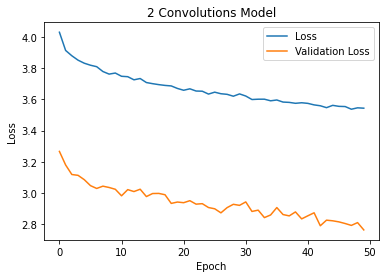

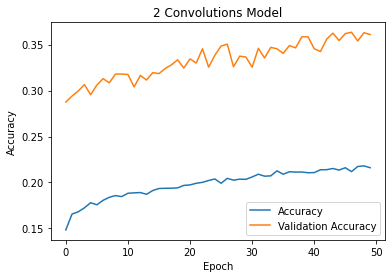

63/63 [==============================] - 12s 73ms/step - loss: 2.7008 - accuracy: 0.3765


[2.700782537460327, 0.3765000104904175]

In [4]:
import matplotlib.pyplot as plt
#Loss
plt.plot(history['loss'],label='Loss')
plt.plot(history['val_loss'],label='Validation Loss')
plt.title("2 Convolutions Model")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('SeqLossGraph.png')
plt.show()
#Accuracy
plt.plot(history['accuracy'],label='Accuracy')
plt.plot(history['val_accuracy'],label='Validation Accuracy')
plt.title("2 Convolutions Model")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('SeqAccuracyGraph.png')
plt.show()
model.evaluate(test_generator)